In [1]:
# Task 1
# Read the CSV file in Pandas and create a DataFrame named Grc_df. 
# What is the number of rows and columns in Grc_df? Print the first 10 and last 10 rows of Grc_df

import pandas as pd

# Read and name the DataFrame
Grc = pd.read_csv('Grocery_dataset.csv')

# Count rows and columns
print("Number of rows and colums:", Grc.shape)

# First 10 rows
print("First 10 rows:")
print(Grc.head(10))

# Last 10 rows
print("Last 10 rows:")
print(Grc.tail(10))

Number of rows and colums: (5000, 12)
First 10 rows:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.

In [4]:
# Task 2
# Are there any null values in the Grc_df? If yes, then in which columns and how many?
# Finally, handle these null values using any strategy shown during the labs.

# Find and count null values per column
print("Number of null values per column:")
print(Grc.isnull().sum())

import numpy as np

# Replace empty strings with NaN for easier handling
Grc = Grc.replace(r'^\s*$', np.nan, regex=True)

# Replace NaN values with "Unknown" in all columns
Grc.replace(np.nan, "Unknown", inplace=True)

# Find and count null values again to confirm handling
print("Number of null values after handling:")
print(Grc.isnull().sum())

Number of null values per column:
Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Number of null values after handling:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [5]:
# Task 3
# How many unique Outlet Sizes are there in the Grc_df? 
# Which outlet size is maximum, and which is minimum?

# Count unique Outlet Sizes in dataset
print("Unique Outlet Sizes:", Grc['Outlet_Size'].unique())
print("Number of unique Outlet Sizes:", Grc['Outlet_Size'].nunique())

# Use pandas value_counts() to find frequency of each Outlet Size
print(Grc['Outlet_Size'].value_counts())

# Use pandas mode() to find the most frequent Outlet Size
print("Most common Outlet Size:", Grc['Outlet_Size'].mode()[0])

# Use pandas value_counts() to find the least frequent Outlet Size
print("Least common Outlet Size:", Grc['Outlet_Size'].value_counts().idxmin())

Unique Outlet Sizes: ['Medium' 'Unknown' 'High' 'Small']
Number of unique Outlet Sizes: 4
Outlet_Size
Medium     1605
Unknown    1439
Small      1398
High        558
Name: count, dtype: int64
Most common Outlet Size: Medium
Least common Outlet Size: High


In [6]:
# Task 4
# How many unique Item Fat Content types are in the Grc_df? 
# List them. Do you see any issues with the Item Fat Content types? 
# If yes, then handle this issue.

# Count unique Item Fat Content types in dataset
print("Unique Item Fat Content types:", Grc['Item_Fat_Content'].unique())

# Issue: Inconsistent capitalization and spelling. 
# More than one representation for low fat and regular.

# Standardize the values by converting to lowercase and replacing variations
Grc['Item_Fat_Content'] = Grc['Item_Fat_Content'].str.lower().replace({
    'lf': 'low fat',
    'reg': 'regular'
})

# Verify the changes
print(Grc['Item_Fat_Content'].unique())

Unique Item Fat Content types: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['low fat' 'regular']


In [7]:
# Task 5
# Drop the columns having index values of 0, 6 
# and create a new DataFrame Grc_new_df.

# Drop the columns(axis=1) with index 0 and 6 and create a new DataFrame called Grc_new_df
Grc_new_df = Grc.drop(Grc.columns[[0, 6]], axis=1)

# Show the first few rows of the new DataFrame to verify
print(Grc_new_df.head(10))

  Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.3          low fat         0.016047                  Dairy   
1        5.92          regular         0.019278            Soft Drinks   
2        17.5          low fat         0.016760                   Meat   
3        19.2          regular         0.000000  Fruits and Vegetables   
4        8.93          low fat         0.000000              Household   
5      10.395          regular         0.000000           Baking Goods   
6       13.65          regular         0.012741            Snack Foods   
7     Unknown          low fat         0.127470            Snack Foods   
8        16.2          regular         0.016687           Frozen Foods   
9        19.2          regular         0.094450           Frozen Foods   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2

In [8]:
# Task 6
# Using different Supermarket type listed in the column 
# Outlet_Type create two different DataFrames from Grc_new_df. 
# Name these DataFrames as SupType_1 and SupType_2.

# Get the unique values
print("Unique Outlet Types:", Grc_new_df['Outlet_Type'].unique())

# Create two DataFrames based on types of supermarkets
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == "Supermarket Type1"]
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == "Supermarket Type2"]

# Show the first few rows of each DataFrame to verify
print("SupType_1:")
print(SupType_1.head(5))

print("SupType_2:")
print(SupType_2.head(5))

Unique Outlet Types: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
SupType_1:
  Item_Weight Item_Fat_Content  Item_Visibility     Item_Type  Item_MRP  \
0         9.3          low fat         0.016047         Dairy  249.8092   
2        17.5          low fat         0.016760          Meat  141.6180   
4        8.93          low fat         0.000000     Household   53.8614   
6       13.65          regular         0.012741   Snack Foods   57.6588   
8        16.2          regular         0.016687  Frozen Foods   96.9726   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
2                       1999      Medium               Tier 1   
4                       1987        High               Tier 3   
6                       1987        High               Tier 3   
8                       2002     Unknown               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Su

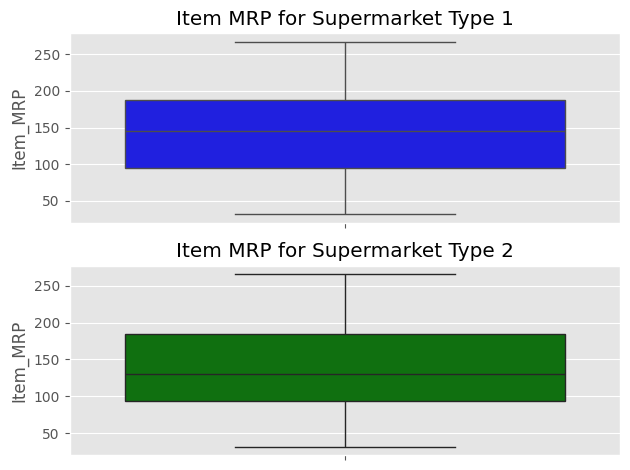

Median Item_MRP for Supermarket Type 1: 144.7457
Median Item_MRP for Supermarket Type 2: 130.18099999999998


In [ ]:
# Task 7
# Using Seaborn (“ggplot style”) create a (2,1) subplot of a box plot 
# showing 5-point summary of the column Item_MRP for SupType_1 and SupType_2. 
# Which Outlet Type has a higher median MRP? Are there any outliers?

# In the terminal: pip install matplotlib seaborn and restart kernel. 
# Run previous tasks before this one.

import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style to ggplot. Makes plots look nicer.
plt.style.use('ggplot')

# Create a (2,1) subplot (vertical layout)
fig, axes = plt.subplots(2, 1)

# Boxplot using seaborn for SupType_1 
sns.boxplot(ax=axes[0], data=SupType_1, y='Item_MRP', color='blue')
axes[0].set_title('Item MRP for Supermarket Type 1')

# Boxplot for SupType_2
sns.boxplot(ax=axes[1], data=SupType_2, y='Item_MRP', color='green')
axes[1].set_title('Item MRP for Supermarket Type 2')

# Adjust spacing to not let elements overlap
plt.tight_layout()
# Display the plots
plt.show()

# Find and print the median Item_MRP for each type
print("Median Item_MRP for Supermarket Type 1:", SupType_1['Item_MRP'].median())
print("Median Item_MRP for Supermarket Type 2:", SupType_2['Item_MRP'].median())

In [ ]:
# Task 8
# Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame
# Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales.
# What is the Outlet_Location_type of the store with the lowest sales?

# Combine the two DataFrames into one
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sort the new DataFrame based on Item_Outlet_Sales in ascending order
Grc_Concat_df = Grc_Concat_df.sort_values(by='Item_Outlet_Sales', ascending=True)

# Show the first few rows to verify sorting
print(Grc_Concat_df.head(10))

# To find the store with the lowest sales:
# Groups by Outlet_Identifier and sums Item_Outlet_Sales for each store
store_sales = Grc_Concat_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

# Finds the store with the lowest total sales
lowest_sales_store = store_sales.idxmin()
print("Store with the lowest total sales:", lowest_sales_store)

# Print the Outlet_Location_Type of this store
location_type = Grc_Concat_df[Grc_Concat_df['Outlet_Identifier'] == lowest_sales_store]['Outlet_Location_Type'].iloc[0]
print("Outlet_Location_Type of this store:", location_type)

     Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
2370        20.5          low fat         0.143164              Household   
1657       6.635          regular         0.046278           Frozen Foods   
1543        6.32          low fat         0.012770                   Meat   
3586       9.105          low fat         0.038560              Household   
2711       19.25          low fat         0.108030              Household   
4959       6.215          low fat         0.012168  Fruits and Vegetables   
660         20.7          low fat         0.048750  Fruits and Vegetables   
4614        15.1          regular         0.106097  Fruits and Vegetables   
1574        20.2          low fat         0.066201              Household   
4174        7.22          regular         0.038289           Baking Goods   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
2370   34.9190                       1987        High               Tier 3

KeyError: 'Outlet_Identifier'